In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
from matplotlib import rc

### tidy data 처리

In [78]:
df = pd.read_csv('./data/국민권익위원회_고충민원 통계현황_20201231.csv', encoding='cp949')
df

,년도,처리건수,평균처리일_전체,평균처리일_시정권고,평균처리일_의견표명,평균처리일_조정합의,평균처리일_심의안내,평균처리일_기 각,평균처리일_기 타
0,2008.0,27509.0,29.0,54.0,68.0,34.0,41.0,50.0,17.0
1,2009.0,28163.0,23.0,58.0,62.0,32.0,44.0,49.0,13.0
2,2010.0,34510.0,21.0,54.0,59.0,31.0,52.0,46.0,15.0
3,2011.0,32082.0,17.0,45.0,59.0,27.0,42.0,42.0,14.0
4,2012.0,33242.0,15.0,55.0,53.0,26.0,41.0,55.0,11.0
5,2013.0,32737.0,18.0,33.0,44.0,23.0,38.0,31.0,16.0
6,2014.0,28744.0,16.0,41.0,54.0,29.0,43.0,38.0,12.0
7,2015.0,23573.0,18.0,49.0,54.0,32.0,50.0,43.0,14.0
8,2016.0,21080.0,17.0,48.0,53.0,34.0,44.0,48.0,12.0
9,2017.0,16149.0,19.0,59.0,55.0,34.0,49.0,49.0,14.0


- 컬럼명 변경

In [79]:
#각 컬럼명을 _ 기준으로 분리
column_split = df.columns.map(lambda x : x.split('_'))

# 리스트 원소 중 마지막 값을 새로운 컬럼리스트로 선언
column_list = []
for x in column_split :
    column_list.append(x[-1])
column_list

#df에 새로운 컬럼명 선언
df.columns = column_list
df

,년도,처리건수,전체,시정권고,의견표명,조정합의,심의안내,기 각,기 타
0,2008.0,27509.0,29.0,54.0,68.0,34.0,41.0,50.0,17.0
1,2009.0,28163.0,23.0,58.0,62.0,32.0,44.0,49.0,13.0
2,2010.0,34510.0,21.0,54.0,59.0,31.0,52.0,46.0,15.0
3,2011.0,32082.0,17.0,45.0,59.0,27.0,42.0,42.0,14.0
4,2012.0,33242.0,15.0,55.0,53.0,26.0,41.0,55.0,11.0
5,2013.0,32737.0,18.0,33.0,44.0,23.0,38.0,31.0,16.0
6,2014.0,28744.0,16.0,41.0,54.0,29.0,43.0,38.0,12.0
7,2015.0,23573.0,18.0,49.0,54.0,32.0,50.0,43.0,14.0
8,2016.0,21080.0,17.0,48.0,53.0,34.0,44.0,48.0,12.0
9,2017.0,16149.0,19.0,59.0,55.0,34.0,49.0,49.0,14.0


- 결측치 삭제

In [81]:
df = df.dropna()
df

,년도,처리건수,전체,시정권고,의견표명,조정합의,심의안내,기 각,기 타
0,2008.0,27509.0,29.0,54.0,68.0,34.0,41.0,50.0,17.0
1,2009.0,28163.0,23.0,58.0,62.0,32.0,44.0,49.0,13.0
2,2010.0,34510.0,21.0,54.0,59.0,31.0,52.0,46.0,15.0
3,2011.0,32082.0,17.0,45.0,59.0,27.0,42.0,42.0,14.0
4,2012.0,33242.0,15.0,55.0,53.0,26.0,41.0,55.0,11.0
5,2013.0,32737.0,18.0,33.0,44.0,23.0,38.0,31.0,16.0
6,2014.0,28744.0,16.0,41.0,54.0,29.0,43.0,38.0,12.0
7,2015.0,23573.0,18.0,49.0,54.0,32.0,50.0,43.0,14.0
8,2016.0,21080.0,17.0,48.0,53.0,34.0,44.0,48.0,12.0
9,2017.0,16149.0,19.0,59.0,55.0,34.0,49.0,49.0,14.0


- data type 변경

In [86]:
df = df.astype(int)
df

,년도,처리건수,전체,시정권고,의견표명,조정합의,심의안내,기 각,기 타
0,2008,27509,29,54,68,34,41,50,17
1,2009,28163,23,58,62,32,44,49,13
2,2010,34510,21,54,59,31,52,46,15
3,2011,32082,17,45,59,27,42,42,14
4,2012,33242,15,55,53,26,41,55,11
5,2013,32737,18,33,44,23,38,31,16
6,2014,28744,16,41,54,29,43,38,12
7,2015,23573,18,49,54,32,50,43,14
8,2016,21080,17,48,53,34,44,48,12
9,2017,16149,19,59,55,34,49,49,14


- 열이름이 변수가 아니라 값인 경우

In [92]:
# 데이터 재편성
df1 = pd.melt(df,["년도"], value_vars=['시정권고', '의견표명','조정합의', '심의안내'], var_name="처리항목", value_name="평균처리일")
df1 = df1.sort_values(by=["처리항목"], ascending=False) # 처리항목 이름순으로 정렬
df1.head()

,년도,처리항목,평균처리일
26,2008,조정합의,34
38,2020,조정합의,67
36,2018,조정합의,34
35,2017,조정합의,34
34,2016,조정합의,34


### 4. 남여별 연령대에서 월급차이는 얼마나 차이가 날까? --> 성별, 연령대, 월급

In [93]:
df=pd.read_excel('./data/survey15.xlsx')
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq
0,201,2,1945,2,NaN,NaN,NaN,NaN,5.0,NaN
1,301,1,1948,2,942.0,167.0,NaN,NaN,5.0,NaN
2,401,1,1942,3,762.0,78.0,NaN,NaN,5.0,NaN
3,601,1,1962,1,532.0,NaN,NaN,NaN,5.0,NaN
4,602,2,1963,1,NaN,NaN,NaN,12.0,5.0,NaN


- 성별 변수 검토

In [113]:
df['sex'].describe()

count    13460.000000
mean         1.548514
std          0.497659
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: sex, dtype: float64

In [114]:
df['sex'].isnull().sum()

0

'>> 성별 변수는 1, 2로 구분, 결측치 없음 <br>
1: 남자 / 2: 여자

In [115]:
# 성별 코드를 명칭으로 바꾸기
df['sex'] = df['sex'].map({1:'남자', 2:'여자'}, na_action=None)
df.head()

,pannel_id,sex,birth_years,married,job_type,salary,major,donation,drink_qty,drink_freq,old,old_bin
0,201,여자,1945,사별,NaN,NaN,NaN,NaN,5.0,NaN,77,70대
1,301,남자,1948,사별,942.0,167.0,NaN,NaN,5.0,NaN,74,70대
2,401,남자,1942,이혼,762.0,78.0,NaN,NaN,5.0,NaN,80,80대
3,601,남자,1962,배우자있음,532.0,NaN,NaN,NaN,5.0,NaN,60,60대
4,602,여자,1963,배우자있음,NaN,NaN,NaN,12.0,5.0,NaN,59,50대


- 연령대 변수 검토

In [116]:
df['birth_years'].describe()

count    13460.000000
mean      1969.469316
std         24.393833
min       1907.000000
25%       1948.000000
50%       1967.000000
75%       1990.000000
max       2019.000000
Name: birth_years, dtype: float64

In [117]:
df['birth_years'].isnull().sum()

0

'>>연령대 변수는 1907년생 ~ 2019년생 총 103가지 종류, 결측치 없음

In [118]:
# 나이를 계산해서 'old'에 넣어주자
df['old'] = [2021 - y + 1 for y in df['birth_years']]
df[['birth_years', 'old']]

,birth_years,old
0,1945,77
1,1948,74
2,1942,80
3,1962,60
4,1963,59
...,...,...
13455,1967,55
13456,1992,30
13457,1995,27
13458,1998,24


- 월급 변수 검토

In [119]:
df['salary'].describe()

count    4487.000000
mean      271.556274
std       200.484282
min         0.000000
25%       150.000000
50%       230.000000
75%       350.000000
max      2167.000000
Name: salary, dtype: float64

In [120]:
df['salary'].isnull().sum()

8973

'>> 월급 변수는 0~2167 까지의 float type, 결측치 8973개

- 연령대 구간 설정하기

In [134]:
#구간정의 (0~120을 10단위 씩)
bins=list(range(0, 121, 10))

# 레이블 정의 (0대, 10대, 20대, ...)
bins_labels = [ str(x)+"대" for x in bins[:-1]]

#df에 age_bin 추가
df['old_bin']=pd.cut(df['old'], bins, right=False, labels=bins_labels)
df[['old', 'old_bin']]

,old,old_bin
0,77,70대
1,74,70대
2,80,80대
3,60,60대
4,59,50대
...,...,...
13455,55,50대
13456,30,30대
13457,27,20대
13458,24,20대


- 월급 구간 설정하기

In [122]:
# 구간 정의 (0-~2200을 100단위싹)
bins = list(range(0,2201, 100))

# 레이블 정의 (100미만, 200미만, ...)
bins_labels = [ str(x)+"미만" for x in bins[1:]]

# df에 "salary_bin" 추가
df['salary_bin'] = pd.cut(df['salary'], bins, right=False, labels=bins_labels[:])
df[['salary','salary_bin']]

,salary,salary_bin
0,NaN,NaN
1,167.0,200미만
2,78.0,100미만
3,NaN,NaN
4,NaN,NaN
...,...,...
13455,NaN,NaN
13456,NaN,NaN
13457,89.0,100미만
13458,184.0,200미만


- 요약표

In [131]:
sex_age_salary = df.groupby(['sex', 'old_bin'])['salary'].agg(**{
    'salary_mean':'mean', 'salary_median':'median',
    }).reset_index() ## 성별 월급
sex_age_salary

,sex,old_bin,salary_mean,salary_median
0,남자,0대,NaN,NaN
1,남자,10대,NaN,NaN
2,남자,20대,201.349112,200.0
3,남자,30대,317.808458,300.0
4,남자,40대,429.680851,408.0
5,남자,50대,456.638623,400.0
6,남자,60대,325.196262,264.0
7,남자,70대,158.296774,156.0
8,남자,80대,52.891892,27.0
9,남자,90대,24.200000,27.0


- 그래프 그리기

In [143]:
#남자 연령대별 월급 평균
male_age_salary = sex_age_salary[sex_age_salary['sex']=='남자']
male_salary = round(male_age_salary['salary_mean'],1).tolist()

#여자 연령대별 월급 평균
female_age_salary = sex_age_salary[sex_age_salary['sex']=='여자']
female_salary = round(female_age_salary['salary_mean'], 1).tolist()

#bins_labels

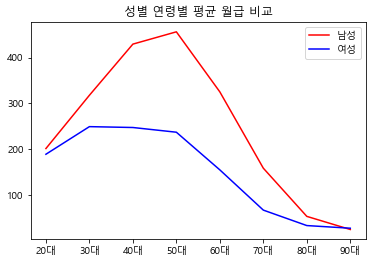

In [144]:
plt.title('성별 연령별 평균 월급 비교')

plt.plot(bins_labels, male_salary, 'r')
plt.plot(bins_labels, female_salary, 'b') 

plt.legend(labels=['남성', '여성'], loc='best')
plt. show()